# Part 1: Reading data of Singapore location from a CSV file


#### CSV file source : https://www.kaggle.com/mylee2009/singapore-postal-code-mapper

In [331]:
%matplotlib inline

import matplotlib as mpl
import matplotlib.pyplot as plt

import pandas as pd
import numpy as np
from unicodedata import normalize
import re, json, requests
from geopy import distance
from math import sqrt

mpl.style.use('ggplot')

In [332]:
df = pd.read_csv('https://raw.githubusercontent.com/nadio2207/DataScienceCapstone/master/sg_zipcode_mapper.csv', encoding='latin-1')

In [333]:
df.head(10)

postal  latitude  longtitude                                 searchval  \
0  398614  1.312763  103.883519                                  # 1 LOFT   
1  398721  1.312390  103.881504                                # 1 SUITES   
2  629875  1.309135  103.679463             1 BENOI ROAD SINGAPORE 629875   
3  439731  1.305466  103.895674          1 BOSCOMBE ROAD SINGAPORE 439731   
4  659592  1.344619  103.749789  1 BUKIT BATOK STREET 22 SINGAPORE 659592   
5  618292  1.314283  103.723913             1 BUROH LANE SINGAPORE 618292   
6  768069  1.437425  103.829625                                1 CANBERRA   
7  768070  1.437019  103.828763                                1 CANBERRA   
8  768071  1.437221  103.828939                                1 CANBERRA   
9  768073  1.437617  103.829271                                1 CANBERRA   

  blk_no              road_name    building  \
0      1      LORONG 24 GEYLANG    # 1 LOFT   
1      1      LORONG 20 GEYLANG  # 1 SUITES   
2      1             BENOI ROAD         NIL   
3      1          BOSCOMBE ROAD         NIL   
4      1  BUKIT BATOK STREET 22         NIL   
5      1             BUROH LANE         NIL   
6      7         CANBERRA DRIVE  1 CANBERRA   
7      9         CANBERRA DRIVE  1 CANBERRA   
8     11         CANBERRA DRIVE  1 CANBERRA   
9     15         CANBERRA DRIVE  1 CANBERRA   

                                           address  postal.1  
0    1 LORONG 24 GEYLANG # 1 LOFT SINGAPORE 398614    398614  
1  1 LORONG 20 GEYLANG # 1 SUITES SINGAPORE 398721    398721  
2                    1 BENOI ROAD SINGAPORE 629875    629875  
3                 1 BOSCOMBE ROAD SINGAPORE 439731    439731  
4         1 BUKIT BATOK STREET 22 SINGAPORE 659592    659592  
5                    1 BUROH LANE SINGAPORE 618292    618292  
6     7 CANBERRA DRIVE 1 CANBERRA SINGAPORE 768069    768069  
7     9 CANBERRA DRIVE 1 CANBERRA SINGAPORE 768070    768070  
8    11 CANBERRA DRIVE 1 CANBERRA SINGAPORE 768071    768071  
9    15 CANBERRA DRIVE 1 CANBERRA SINGAPORE 768073    768073

In [334]:
df.shape

(25293, 9)

In [335]:
# Get indexes where no building name
indexNames = df[(df['building'] == 'NIL')].index 
# Delete these row indexes from dataFrame
df.drop(indexNames , inplace=True)

In [336]:
df.shape

(21239, 9)

In [337]:
df = df.drop_duplicates(subset=['building'])

In [338]:
df["area"] = df["postal"].astype("str").str[:2]
df.head(11)


postal  latitude  longtitude          searchval blk_no  \
0     398614  1.312763  103.883519           # 1 LOFT      1   
1     398721  1.312390  103.881504         # 1 SUITES      1   
6     768069  1.437425  103.829625         1 CANBERRA      7   
59    308143  1.319086  103.847054    1 MOULMEIN RISE      1   
127   288353  1.325808  103.812517        10 SHELFORD     10   
149   118518  1.275430  103.795764  100 PASIR PANJANG    100   
340   229391  1.305059  103.839236   111 EMERALD HILL    111   
347   428802  1.305206  103.905045         112 KATONG    112   
1102  288407  1.327320  103.812832        18 SHELFORD     18   
1107  539775  1.336316  103.888826        18 TAI SENG     18   
1115  357799  1.329580  103.868188      18 WOODSVILLE     18   

               road_name           building  \
0      LORONG 24 GEYLANG           # 1 LOFT   
1      LORONG 20 GEYLANG         # 1 SUITES   
6         CANBERRA DRIVE         1 CANBERRA   
59         MOULMEIN RISE    1 MOULMEIN RISE   
127        SHELFORD ROAD        10 SHELFORD   
149   PASIR PANJANG ROAD  100 PASIR PANJANG   
340    EMERALD HILL ROAD   111 EMERALD HILL   
347      EAST COAST ROAD         112 KATONG   
1102       SHELFORD ROAD        18 SHELFORD   
1107     TAI SENG STREET        18 TAI SENG   
1115    WOODSVILLE CLOSE      18 WOODSVILLE   

                                                address  postal.1 area  
0         1 LORONG 24 GEYLANG # 1 LOFT SINGAPORE 398614    398614   39  
1       1 LORONG 20 GEYLANG # 1 SUITES SINGAPORE 398721    398721   39  
6          7 CANBERRA DRIVE 1 CANBERRA SINGAPORE 768069    768069   76  
59     1 MOULMEIN RISE 1 MOULMEIN RISE SINGAPORE 308143    308143   30  
127       10 SHELFORD ROAD 10 SHELFORD SINGAPORE 288353    288353   28  
149   100 PASIR PANJANG ROAD 100 PASIR PANJANG SINGA...    118518   11  
340   111 EMERALD HILL ROAD 111 EMERALD HILL SINGAPO...    229391   22  
347     112 EAST COAST ROAD 112 KATONG SINGAPORE 428802    428802   42  
1102      18 SHELFORD ROAD 18 SHELFORD SINGAPORE 288407    288407   28  
1107    18 TAI SENG STREET 18 TAI SENG SINGAPORE 539775    539775   53  
1115  18 WOODSVILLE CLOSE 18 WOODSVILLE SINGAPORE 35...    357799   35

In [339]:
df["area"] = df["area"].astype("int")
df.dtypes

postal          int64
latitude      float64
longtitude    float64
searchval      object
blk_no         object
road_name      object
building       object
address        object
postal.1        int64
area            int64
dtype: object

In [340]:
df = df.rename(columns={'building': 'Neighbourhood'})

In [341]:
df.head()

postal  latitude  longtitude        searchval blk_no          road_name  \
0    398614  1.312763  103.883519         # 1 LOFT      1  LORONG 24 GEYLANG   
1    398721  1.312390  103.881504       # 1 SUITES      1  LORONG 20 GEYLANG   
6    768069  1.437425  103.829625       1 CANBERRA      7     CANBERRA DRIVE   
59   308143  1.319086  103.847054  1 MOULMEIN RISE      1      MOULMEIN RISE   
127  288353  1.325808  103.812517      10 SHELFORD     10      SHELFORD ROAD   

       Neighbourhood                                           address  \
0           # 1 LOFT     1 LORONG 24 GEYLANG # 1 LOFT SINGAPORE 398614   
1         # 1 SUITES   1 LORONG 20 GEYLANG # 1 SUITES SINGAPORE 398721   
6         1 CANBERRA      7 CANBERRA DRIVE 1 CANBERRA SINGAPORE 768069   
59   1 MOULMEIN RISE  1 MOULMEIN RISE 1 MOULMEIN RISE SINGAPORE 308143   
127      10 SHELFORD     10 SHELFORD ROAD 10 SHELFORD SINGAPORE 288353   

     postal.1  area  
0      398614    39  
1      398721    39  
6      768069    76  
59     308143    30  
127    288353    28

#### Read data with postal code information
#### CSV file source : https://en.wikipedia.org/wiki/Postal_codes_in_Singapore


In [342]:
postal_table = pd.read_html('https://en.wikipedia.org/wiki/Postal_codes_in_Singapore')

In [343]:
df_postal = postal_table[0]
df_postal.head(5)

Postal district Postal sector(1st 2 digits of 6-digit postal codes)  \
0                1                             01, 02, 03, 04, 05, 06    
1                2                                             07, 08    
2                3                                         14, 15, 16    
3                4                                             09, 10    
4                5                                         11, 12, 13    

                                    General location  
0        Raffles Place, Cecil, Marina, People's Park  
1                               Anson, Tanjong Pagar  
2               Bukit Merah, Queenstown, Tiong Bahru  
3                        Telok Blangah, Harbourfront  
4  Pasir Panjang, Hong Leong Garden, Clementi New...

In [344]:
df_postal = df_postal.rename(columns={'Postal sector(1st 2 digits of 6-digit postal codes)': 'area'})
df_postal.dtypes

Postal district      int64
area                object
General location    object
dtype: object

In [345]:
df_postal 

Postal district                    area  \
0                 1  01, 02, 03, 04, 05, 06   
1                 2                  07, 08   
2                 3              14, 15, 16   
3                 4                  09, 10   
4                 5              11, 12, 13   
5                 6                      17   
6                 7                  18, 19   
7                 8                  20, 21   
8                 9                  22, 23   
9                10          24, 25, 26, 27   
10               11              28, 29, 30   
11               12              31, 32, 33   
12               13          34, 35, 36, 37   
13               14          38, 39, 40, 41   
14               15          42, 43, 44, 45   
15               16              46, 47, 48   
16               17              49, 50, 81   
17               18                  51, 52   
18               19          53, 54, 55, 82   
19               20                  56, 57   
20               21                  58, 59   
21               22      60, 61, 62, 63, 64   
22               23          65, 66, 67, 68   
23               24              69, 70, 71   
24               25                  72, 73   
25               26                  77, 78   
26               27                  75, 76   
27               28                  79, 80   

                                     General location  
0         Raffles Place, Cecil, Marina, People's Park  
1                                Anson, Tanjong Pagar  
2                Bukit Merah, Queenstown, Tiong Bahru  
3                         Telok Blangah, Harbourfront  
4   Pasir Panjang, Hong Leong Garden, Clementi New...  
5                      High Street, Beach Road (part)  
6                            Middle Road, Golden Mile  
7    Little India, Farrer Park, Jalan Besar, Lavender  
8                    Orchard, Cairnhill, River Valley  
9         Ardmore, Bukit Timah, Holland Road, Tanglin  
10                     Watten Estate, Novena, Thomson  
11                    Balestier, Toa Payoh, Serangoon  
12       Macpherson, Braddell, Potong Pasir, Bidadari  
13                           Geylang, Eunos, Aljunied  
14                      Katong, Joo Chiat, Amber Road  
15       Bedok, Upper East Coast, Eastwood, Kew Drive  
16                                     Loyang, Changi  
17                         Simei, Tampines, Pasir Ris  
18                 Serangoon Garden, Hougang, Punggol  
19                                 Bishan, Ang Mo Kio  
20       Upper Bukit Timah, Clementi Park, Ulu Pandan  
21                     Penjuru, Jurong, Pioneer, Tuas  
22  Hillview, Dairy Farm, Bukit Panjang, Choa Chu ...  
23                               Lim Chu Kang, Tengah  
24                       Kranji, Woodgrove, Woodlands  
25                          Upper Thomson, Springleaf  
26                          Yishun, Sembawang, Senoko  
27                                            Seletar

# Part 2: Data Wrangling

In [346]:
df_postal["area"] = df_postal.area.str.split(',').tolist()
df_postal

Postal district                           area  \
0                 1  [01,  02,  03,  04,  05,  06]   
1                 2                      [07,  08]   
2                 3                 [14,  15,  16]   
3                 4                      [09,  10]   
4                 5                 [11,  12,  13]   
5                 6                           [17]   
6                 7                      [18,  19]   
7                 8                      [20,  21]   
8                 9                      [22,  23]   
9                10            [24,  25,  26,  27]   
10               11                 [28,  29,  30]   
11               12                 [31,  32,  33]   
12               13            [34,  35,  36,  37]   
13               14            [38,  39,  40,  41]   
14               15            [42,  43,  44,  45]   
15               16                 [46,  47,  48]   
16               17                 [49,  50,  81]   
17               18                      [51,  52]   
18               19            [53,  54,  55,  82]   
19               20                      [56,  57]   
20               21                      [58,  59]   
21               22       [60,  61,  62,  63,  64]   
22               23            [65,  66,  67,  68]   
23               24                 [69,  70,  71]   
24               25                      [72,  73]   
25               26                      [77,  78]   
26               27                      [75,  76]   
27               28                      [79,  80]   

                                     General location  
0         Raffles Place, Cecil, Marina, People's Park  
1                                Anson, Tanjong Pagar  
2                Bukit Merah, Queenstown, Tiong Bahru  
3                         Telok Blangah, Harbourfront  
4   Pasir Panjang, Hong Leong Garden, Clementi New...  
5                      High Street, Beach Road (part)  
6                            Middle Road, Golden Mile  
7    Little India, Farrer Park, Jalan Besar, Lavender  
8                    Orchard, Cairnhill, River Valley  
9         Ardmore, Bukit Timah, Holland Road, Tanglin  
10                     Watten Estate, Novena, Thomson  
11                    Balestier, Toa Payoh, Serangoon  
12       Macpherson, Braddell, Potong Pasir, Bidadari  
13                           Geylang, Eunos, Aljunied  
14                      Katong, Joo Chiat, Amber Road  
15       Bedok, Upper East Coast, Eastwood, Kew Drive  
16                                     Loyang, Changi  
17                         Simei, Tampines, Pasir Ris  
18                 Serangoon Garden, Hougang, Punggol  
19                                 Bishan, Ang Mo Kio  
20       Upper Bukit Timah, Clementi Park, Ulu Pandan  
21                     Penjuru, Jurong, Pioneer, Tuas  
22  Hillview, Dairy Farm, Bukit Panjang, Choa Chu ...  
23                               Lim Chu Kang, Tengah  
24                       Kranji, Woodgrove, Woodlands  
25                          Upper Thomson, Springleaf  
26                          Yishun, Sembawang, Senoko  
27                                            Seletar

In [347]:
df_postal = df_postal.explode('area')

In [348]:
df_postal["area"] = df_postal["area"].astype("int")
df_postal

Postal district  area                             General location
0                 1     1  Raffles Place, Cecil, Marina, People's Park
0                 1     2  Raffles Place, Cecil, Marina, People's Park
0                 1     3  Raffles Place, Cecil, Marina, People's Park
0                 1     4  Raffles Place, Cecil, Marina, People's Park
0                 1     5  Raffles Place, Cecil, Marina, People's Park
..              ...   ...                                          ...
25               26    78                    Upper Thomson, Springleaf
26               27    75                    Yishun, Sembawang, Senoko
26               27    76                    Yishun, Sembawang, Senoko
27               28    79                                      Seletar
27               28    80                                      Seletar

[81 rows x 3 columns]

### Merge the 2 dataframe

In [349]:
result = pd.merge(df, df_postal, how="outer", on=["area"])
result

postal  latitude  longtitude               searchval blk_no  \
0     398614.0  1.312763  103.883519                # 1 LOFT      1   
1     398721.0  1.312390  103.881504              # 1 SUITES      1   
2     398008.0  1.308466  103.878985       223 @ MOUNTBATTEN    223   
3     398495.0  1.311780  103.884606  28 IMPERIAL RESIDENCES     28   
4     398026.0  1.314311  103.890714          ASTON MANSIONS      3   
...        ...       ...         ...                     ...    ...   
5005       NaN       NaN         NaN                     NaN    NaN   
5006       NaN       NaN         NaN                     NaN    NaN   
5007       NaN       NaN         NaN                     NaN    NaN   
5008       NaN       NaN         NaN                     NaN    NaN   
5009       NaN       NaN         NaN                     NaN    NaN   

              road_name           Neighbourhood  \
0     LORONG 24 GEYLANG                # 1 LOFT   
1     LORONG 20 GEYLANG              # 1 SUITES   
2      MOUNTBATTEN ROAD       223 @ MOUNTBATTEN   
3     LORONG 26 GEYLANG  28 IMPERIAL RESIDENCES   
4     LORONG 42 GEYLANG          ASTON MANSIONS   
...                 ...                     ...   
5005                NaN                     NaN   
5006                NaN                     NaN   
5007                NaN                     NaN   
5008                NaN                     NaN   
5009                NaN                     NaN   

                                                address  postal.1  area  \
0         1 LORONG 24 GEYLANG # 1 LOFT SINGAPORE 398614  398614.0    39   
1       1 LORONG 20 GEYLANG # 1 SUITES SINGAPORE 398721  398721.0    39   
2     223 MOUNTBATTEN ROAD 223 @ MOUNTBATTEN SINGAPO...  398008.0    39   
3     28 LORONG 26 GEYLANG 28 IMPERIAL RESIDENCES SI...  398495.0    39   
4     3 LORONG 42 GEYLANG ASTON MANSIONS SINGAPORE 3...  398026.0    39   
...                                                 ...       ...   ...   
5005                                                NaN       NaN     7   
5006                                                NaN       NaN     8   
5007                                                NaN       NaN     9   
5008                                                NaN       NaN    70   
5009                                                NaN       NaN    71   

      Postal district             General location  
0                14.0     Geylang, Eunos, Aljunied  
1                14.0     Geylang, Eunos, Aljunied  
2                14.0     Geylang, Eunos, Aljunied  
3                14.0     Geylang, Eunos, Aljunied  
4                14.0     Geylang, Eunos, Aljunied  
...               ...                          ...  
5005              2.0         Anson, Tanjong Pagar  
5006              2.0         Anson, Tanjong Pagar  
5007              4.0  Telok Blangah, Harbourfront  
5008             24.0         Lim Chu Kang, Tengah  
5009             24.0         Lim Chu Kang, Tengah  

[5010 rows x 12 columns]

In [350]:
result.dtypes

postal              float64
latitude            float64
longtitude          float64
searchval            object
blk_no               object
road_name            object
Neighbourhood        object
address              object
postal.1            float64
area                  int64
Postal district     float64
General location     object
dtype: object

### Remove unecessary column


In [351]:
result.drop(["postal.1"], axis = 1, inplace = True) 
result

postal  latitude  longtitude               searchval blk_no  \
0     398614.0  1.312763  103.883519                # 1 LOFT      1   
1     398721.0  1.312390  103.881504              # 1 SUITES      1   
2     398008.0  1.308466  103.878985       223 @ MOUNTBATTEN    223   
3     398495.0  1.311780  103.884606  28 IMPERIAL RESIDENCES     28   
4     398026.0  1.314311  103.890714          ASTON MANSIONS      3   
...        ...       ...         ...                     ...    ...   
5005       NaN       NaN         NaN                     NaN    NaN   
5006       NaN       NaN         NaN                     NaN    NaN   
5007       NaN       NaN         NaN                     NaN    NaN   
5008       NaN       NaN         NaN                     NaN    NaN   
5009       NaN       NaN         NaN                     NaN    NaN   

              road_name           Neighbourhood  \
0     LORONG 24 GEYLANG                # 1 LOFT   
1     LORONG 20 GEYLANG              # 1 SUITES   
2      MOUNTBATTEN ROAD       223 @ MOUNTBATTEN   
3     LORONG 26 GEYLANG  28 IMPERIAL RESIDENCES   
4     LORONG 42 GEYLANG          ASTON MANSIONS   
...                 ...                     ...   
5005                NaN                     NaN   
5006                NaN                     NaN   
5007                NaN                     NaN   
5008                NaN                     NaN   
5009                NaN                     NaN   

                                                address  area  \
0         1 LORONG 24 GEYLANG # 1 LOFT SINGAPORE 398614    39   
1       1 LORONG 20 GEYLANG # 1 SUITES SINGAPORE 398721    39   
2     223 MOUNTBATTEN ROAD 223 @ MOUNTBATTEN SINGAPO...    39   
3     28 LORONG 26 GEYLANG 28 IMPERIAL RESIDENCES SI...    39   
4     3 LORONG 42 GEYLANG ASTON MANSIONS SINGAPORE 3...    39   
...                                                 ...   ...   
5005                                                NaN     7   
5006                                                NaN     8   
5007                                                NaN     9   
5008                                                NaN    70   
5009                                                NaN    71   

      Postal district             General location  
0                14.0     Geylang, Eunos, Aljunied  
1                14.0     Geylang, Eunos, Aljunied  
2                14.0     Geylang, Eunos, Aljunied  
3                14.0     Geylang, Eunos, Aljunied  
4                14.0     Geylang, Eunos, Aljunied  
...               ...                          ...  
5005              2.0         Anson, Tanjong Pagar  
5006              2.0         Anson, Tanjong Pagar  
5007              4.0  Telok Blangah, Harbourfront  
5008             24.0         Lim Chu Kang, Tengah  
5009             24.0         Lim Chu Kang, Tengah  

[5010 rows x 11 columns]

# Standerdized data type to be in int format

In [352]:
result = result.dropna()
result

postal  latitude  longtitude                 searchval blk_no  \
0     398614.0  1.312763  103.883519                  # 1 LOFT      1   
1     398721.0  1.312390  103.881504                # 1 SUITES      1   
2     398008.0  1.308466  103.878985         223 @ MOUNTBATTEN    223   
3     398495.0  1.311780  103.884606    28 IMPERIAL RESIDENCES     28   
4     398026.0  1.314311  103.890714            ASTON MANSIONS      3   
...        ...       ...         ...                       ...    ...   
4980  448879.0  1.308308  103.928198           VICTORIA SCHOOL      4   
4995  778904.0  1.404771  103.817861  FOREST HILLS CONDOMINIUM     27   
4996  779086.0  1.402969  103.818313        HONG HENG MANSIONS     56   
4997  778997.0  1.403274  103.817003         HONG HENG TERRACE     16   
4998  779210.0  1.403026  103.813677             MANDAI GARDEN      7   

              road_name             Neighbourhood  \
0     LORONG 24 GEYLANG                  # 1 LOFT   
1     LORONG 20 GEYLANG                # 1 SUITES   
2      MOUNTBATTEN ROAD         223 @ MOUNTBATTEN   
3     LORONG 26 GEYLANG    28 IMPERIAL RESIDENCES   
4     LORONG 42 GEYLANG            ASTON MANSIONS   
...                 ...                       ...   
4980        SIGLAP LINK           VICTORIA SCHOOL   
4995       TRANSIT ROAD  FOREST HILLS CONDOMINIUM   
4996     SEMBAWANG ROAD        HONG HENG MANSIONS   
4997     THONG BEE ROAD         HONG HENG TERRACE   
4998     MENG SUAN ROAD             MANDAI GARDEN   

                                                address  area  \
0         1 LORONG 24 GEYLANG # 1 LOFT SINGAPORE 398614    39   
1       1 LORONG 20 GEYLANG # 1 SUITES SINGAPORE 398721    39   
2     223 MOUNTBATTEN ROAD 223 @ MOUNTBATTEN SINGAPO...    39   
3     28 LORONG 26 GEYLANG 28 IMPERIAL RESIDENCES SI...    39   
4     3 LORONG 42 GEYLANG ASTON MANSIONS SINGAPORE 3...    39   
...                                                 ...   ...   
4980     4 SIGLAP LINK VICTORIA SCHOOL SINGAPORE 448879    44   
4995  27 TRANSIT ROAD FOREST HILLS CONDOMINIUM SINGA...    77   
4996  56 SEMBAWANG ROAD HONG HENG MANSIONS SINGAPORE...    77   
4997  16 THONG BEE ROAD HONG HENG TERRACE SINGAPORE ...    77   
4998    7 MENG SUAN ROAD MANDAI GARDEN SINGAPORE 779210    77   

      Postal district               General location  
0                14.0       Geylang, Eunos, Aljunied  
1                14.0       Geylang, Eunos, Aljunied  
2                14.0       Geylang, Eunos, Aljunied  
3                14.0       Geylang, Eunos, Aljunied  
4                14.0       Geylang, Eunos, Aljunied  
...               ...                            ...  
4980             15.0  Katong, Joo Chiat, Amber Road  
4995             26.0      Upper Thomson, Springleaf  
4996             26.0      Upper Thomson, Springleaf  
4997             26.0      Upper Thomson, Springleaf  
4998             26.0      Upper Thomson, Springleaf  

[4919 rows x 11 columns]

In [353]:
result = result.fillna(0)

In [354]:
result["Postal district"] = result["Postal district"].astype("int")
result["postal"] = result["postal"].astype("int")
result

postal  latitude  longtitude                 searchval blk_no  \
0     398614  1.312763  103.883519                  # 1 LOFT      1   
1     398721  1.312390  103.881504                # 1 SUITES      1   
2     398008  1.308466  103.878985         223 @ MOUNTBATTEN    223   
3     398495  1.311780  103.884606    28 IMPERIAL RESIDENCES     28   
4     398026  1.314311  103.890714            ASTON MANSIONS      3   
...      ...       ...         ...                       ...    ...   
4980  448879  1.308308  103.928198           VICTORIA SCHOOL      4   
4995  778904  1.404771  103.817861  FOREST HILLS CONDOMINIUM     27   
4996  779086  1.402969  103.818313        HONG HENG MANSIONS     56   
4997  778997  1.403274  103.817003         HONG HENG TERRACE     16   
4998  779210  1.403026  103.813677             MANDAI GARDEN      7   

              road_name             Neighbourhood  \
0     LORONG 24 GEYLANG                  # 1 LOFT   
1     LORONG 20 GEYLANG                # 1 SUITES   
2      MOUNTBATTEN ROAD         223 @ MOUNTBATTEN   
3     LORONG 26 GEYLANG    28 IMPERIAL RESIDENCES   
4     LORONG 42 GEYLANG            ASTON MANSIONS   
...                 ...                       ...   
4980        SIGLAP LINK           VICTORIA SCHOOL   
4995       TRANSIT ROAD  FOREST HILLS CONDOMINIUM   
4996     SEMBAWANG ROAD        HONG HENG MANSIONS   
4997     THONG BEE ROAD         HONG HENG TERRACE   
4998     MENG SUAN ROAD             MANDAI GARDEN   

                                                address  area  \
0         1 LORONG 24 GEYLANG # 1 LOFT SINGAPORE 398614    39   
1       1 LORONG 20 GEYLANG # 1 SUITES SINGAPORE 398721    39   
2     223 MOUNTBATTEN ROAD 223 @ MOUNTBATTEN SINGAPO...    39   
3     28 LORONG 26 GEYLANG 28 IMPERIAL RESIDENCES SI...    39   
4     3 LORONG 42 GEYLANG ASTON MANSIONS SINGAPORE 3...    39   
...                                                 ...   ...   
4980     4 SIGLAP LINK VICTORIA SCHOOL SINGAPORE 448879    44   
4995  27 TRANSIT ROAD FOREST HILLS CONDOMINIUM SINGA...    77   
4996  56 SEMBAWANG ROAD HONG HENG MANSIONS SINGAPORE...    77   
4997  16 THONG BEE ROAD HONG HENG TERRACE SINGAPORE ...    77   
4998    7 MENG SUAN ROAD MANDAI GARDEN SINGAPORE 779210    77   

      Postal district               General location  
0                  14       Geylang, Eunos, Aljunied  
1                  14       Geylang, Eunos, Aljunied  
2                  14       Geylang, Eunos, Aljunied  
3                  14       Geylang, Eunos, Aljunied  
4                  14       Geylang, Eunos, Aljunied  
...               ...                            ...  
4980               15  Katong, Joo Chiat, Amber Road  
4995               26      Upper Thomson, Springleaf  
4996               26      Upper Thomson, Springleaf  
4997               26      Upper Thomson, Springleaf  
4998               26      Upper Thomson, Springleaf  

[4919 rows x 11 columns]

# Part 3: Reading data for existing Fitness Center available in Singapore 


In [355]:
url = 'https://raw.githubusercontent.com/nadio2207/DataScienceCapstone/master/gyms-sg-geojson.geojson'
resp = requests.get(url)

In [356]:
resp_parsed = re.sub(r'^jsonp\d+\(|\)\s+$', '', resp.text)
data = json.loads(resp_parsed)
print(data)

{'type': 'FeatureCollection', 'crs': {'type': 'name', 'properties': {'name': 'urn:ogc:def:crs:OGC:1.3:CRS84'}}, 'features': [{'type': 'Feature', 'properties': {'Name': 'kml_1', 'Description': '<center><table><tr><th colspan=\'2\' align=\'center\'><em>Attributes</em></th></tr><tr bgcolor="#E3E3F3"> <th>LANDYADDRESSPOINT</th> <td>0</td> </tr><tr bgcolor=""> <th>LANDXADDRESSPOINT</th> <td>0</td> </tr><tr bgcolor="#E3E3F3"> <th>ADDRESSPOSTALCODE</th> <td>78989</td> </tr><tr bgcolor=""> <th>ADDRESSBUILDINGNAME</th> <td></td> </tr><tr bgcolor="#E3E3F3"> <th>HYPERLINK</th> <td></td> </tr><tr bgcolor=""> <th>PHOTOURL</th> <td></td> </tr><tr bgcolor="#E3E3F3"> <th>ADDRESSUNITNUMBER</th> <td></td> </tr><tr bgcolor=""> <th>ADDRESSFLOORNUMBER</th> <td></td> </tr><tr bgcolor="#E3E3F3"> <th>ADDRESSSTREETNAME</th> <td>Tras Street</td> </tr><tr bgcolor=""> <th>ADDRESSBLOCKHOUSENUMBER</th> <td>50</td> </tr><tr bgcolor="#E3E3F3"> <th>DESCRIPTION</th> <td>Operating Hours: 7.00am - 10.00am</td> </tr><tr b

In [357]:
df_existing = pd.DataFrame(columns=['Latitude', 'Longitude'])

In [358]:
pattern = r"^\[(\S+), (\S+),"

for feature in data['features']:
    text =str(feature['geometry']['coordinates'])
    result_ = re.search(pattern, text)
    df_existing = df_existing.append({'Latitude': result_[2], 'Longitude': result_[1]}, ignore_index=True)

In [359]:
df_existing

Latitude         Longitude
0    1.27811388348071  103.844202079592
1     1.3342195983767  103.795898242377
2    1.35528262760188  103.850922071159
3    1.30992191079359  103.862090963732
4    1.36000966368369   103.85957105374
..                ...               ...
154   1.2884814659674  103.849144620549
155  1.30550611670641  103.829984827987
156  1.33983014805774  103.706460886826
157  1.29151478613339  103.844586298874
158  1.35431556438278   103.94501945797

[159 rows x 2 columns]

# Part 4: Analysis for Bukit Timah neighbourhood using Four Square & K clustering


In [26]:
import json # library to handle JSON files

!conda install -c conda-forge geopy --yes # uncomment this line if you haven't completed the Foursquare API lab
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

# import k-means from clustering stage
from sklearn.cluster import KMeans

!conda install -c conda-forge folium=0.5.0 --yes # uncomment this line if you haven't completed the Foursquare API lab
import folium # map rendering library

Solving environment: done

# All requested packages already installed.

Solving environment: done

# All requested packages already installed.



In [364]:
#get the lat and long for Bukit Timah Singapore
address = 'Bukit Timah, Singapore'

geolocator = Nominatim(user_agent="sg_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Bukit Timah, Singapore are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of Bukit Timah, Singapore are 1.3546901, 103.7763724.


In [368]:
#dataframe with only Bukit Timah data
btimah_data = result[result['General location'].str.contains('Bukit Timah', na=False)].reset_index(drop=True)
btimah_data.head()

postal  latitude  longtitude          searchval blk_no     road_name  \
0  258482  1.306641  103.821287          19 NASSIM     19   NASSIM HILL   
1  258502  1.306910  103.820683           8 NAPIER      8   NAPIER ROAD   
2  259947  1.309210  103.828264         ARDMORE II      2  ARDMORE PARK   
3  259955  1.309511  103.829220       ARDMORE PARK      9  ARDMORE PARK   
4  259954  1.310071  103.828595  ARDMORE RESIDENCE      7  ARDMORE PARK   

       Neighbourhood                                            address  area  \
0          19 NASSIM          19 NASSIM HILL 19 NASSIM SINGAPORE 258482    25   
1           8 NAPIER            8 NAPIER ROAD 8 NAPIER SINGAPORE 258502    25   
2         ARDMORE II         2 ARDMORE PARK ARDMORE II SINGAPORE 259947    25   
3       ARDMORE PARK       9 ARDMORE PARK ARDMORE PARK SINGAPORE 259955    25   
4  ARDMORE RESIDENCE  7 ARDMORE PARK ARDMORE RESIDENCE SINGAPORE 259954    25   

   Postal district                             General location  
0               10  Ardmore, Bukit Timah, Holland Road, Tanglin  
1               10  Ardmore, Bukit Timah, Holland Road, Tanglin  
2               10  Ardmore, Bukit Timah, Holland Road, Tanglin  
3               10  Ardmore, Bukit Timah, Holland Road, Tanglin  
4               10  Ardmore, Bukit Timah, Holland Road, Tanglin

In [369]:
btimah_data.shape

(562, 11)

In [370]:
# create map of  using latitude and longitude values
map_btimah = folium.Map(location=[latitude, longitude], zoom_start=10)

# add markers to map
for lat, lng, general_loc, neighbourhood in zip(btimah_data['latitude'], btimah_data['longtitude'], btimah_data['General location'], btimah_data['Neighbourhood']):
    label = '{}, {}'.format(general_loc, neighbourhood)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_btimah)  
    
map_btimah

In [371]:
#Foursquare credentials
CLIENT_ID = 'CXZT05YKXPIGBEBLOX0BTXAFP0COCEIEE32T05G3VAEHSPKH' # your Foursquare ID
CLIENT_SECRET = 'T2DQZPE1E0244DTLEGJUUDKGYA2UYD4BX1HFAONWJ3QJWIA2' # your Foursquare Secret
VERSION = '20180605' # Foursquare API version
LIMIT = 100 # A default Foursquare API limit value

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: CXZT05YKXPIGBEBLOX0BTXAFP0COCEIEE32T05G3VAEHSPKH
CLIENT_SECRET:T2DQZPE1E0244DTLEGJUUDKGYA2UYD4BX1HFAONWJ3QJWIA2


In [372]:
#get the request URL
LIMIT = 100 # limit of number of venues returned by Foursquare API
radius = 500 # define radius

url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
    CLIENT_ID, 
    CLIENT_SECRET, 
    VERSION, 
    latitude, 
    longitude, 
    radius, 
    LIMIT)
url # display URL

'https://api.foursquare.com/v2/venues/explore?&client_id=CXZT05YKXPIGBEBLOX0BTXAFP0COCEIEE32T05G3VAEHSPKH&client_secret=T2DQZPE1E0244DTLEGJUUDKGYA2UYD4BX1HFAONWJ3QJWIA2&v=20180605&ll=1.3546901,103.7763724&radius=500&limit=100'

In [373]:
results = requests.get(url).json()
results

{'meta': {'code': 200, 'requestId': '6031f06415eb872325961aeb'},
 'response': {'suggestedFilters': {'header': 'Tap to show:',
   'filters': [{'name': 'Open now', 'key': 'openNow'}]},
  'headerLocation': 'Bukit Panjang',
  'headerFullLocation': 'Bukit Panjang, Singapore',
  'headerLocationGranularity': 'neighborhood',
  'totalResults': 12,
  'suggestedBounds': {'ne': {'lat': 1.3591901045000045,
    'lng': 103.78086525823811},
   'sw': {'lat': 1.3501900954999955, 'lng': 103.77187954176189}},
  'groups': [{'type': 'Recommended Places',
    'name': 'recommended',
    'items': [{'reasons': {'count': 0,
       'items': [{'summary': 'This spot is popular',
         'type': 'general',
         'reasonName': 'globalInteractionReason'}]},
      'venue': {'id': '4b7608bcf964a52016382ee3',
       'name': 'Bukit Timah Summit',
       'location': {'address': 'Bukit Timah Nature Reserve',
        'lat': 1.3546220023582631,
        'lng': 103.77637447262104,
        'labeledLatLngs': [{'label': 'displ

In [374]:
# function that extracts the category of the venue
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

In [375]:
venues = results['response']['groups'][0]['items']
    
nearby_venues = json_normalize(venues) # flatten JSON

# filter columns
filtered_columns = ['venue.name', 'venue.categories', 'venue.location.lat', 'venue.location.lng']
nearby_venues =nearby_venues.loc[:, filtered_columns]

# filter the category for each row
nearby_venues['venue.categories'] = nearby_venues.apply(get_category_type, axis=1)

# clean columns
nearby_venues.columns = [col.split(".")[-1] for col in nearby_venues.columns]

nearby_venues.head()

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
  This is separate from the ipykernel package so we can avoid doing imports until


name      categories       lat         lng
0         Bukit Timah Summit  Scenic Lookout  1.354622  103.776374
1           Bukit Timah Hill            Hill  1.353295  103.777199
2                Rengas Path           Trail  1.355533  103.775901
3  Summit Path (Summit Step)           Trail  1.354070  103.776971
4                 Summit Hut       Rest Area  1.354693  103.776492

In [376]:
print('{} venues were returned by Foursquare.'.format(nearby_venues.shape[0]))

12 venues were returned by Foursquare.


In [377]:
def getNearbyVenues(names, latitudes, longitudes, radius=50):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            50)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        
        for v in results:
            # return only relevant information for each nearby venue
            #get Venue Id
            VENUE_ID = v['venue']['id']
            print(VENUE_ID)
        
            #get how many likes the venue has
            url_ = 'https://api.foursquare.com/v2/venues/{}/likes?&client_id={}&client_secret={}&v={}'.format(
                    VENUE_ID,
                    CLIENT_ID,
                    CLIENT_SECRET,
                    VERSION)

            results_ = requests.get(url_).json()
            likes = results_['response']['likes']['count']
            
            venues_list.append([(
                name, 
                lat, 
                lng, 
                v['venue']['name'], 
                v['venue']['location']['lat'], 
                v['venue']['location']['lng'],  
                v['venue']['categories'][0]['name'],
                likes)])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighbourhood', 
                  'Neighbourhood Latitude', 
                  'Neighbourhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category',
                  'Likes Count']
    
    return(nearby_venues)

In [378]:
#get nearby venues around the neighbourhood
geylang_venues = getNearbyVenues(names=btimah_data['Neighbourhood'],
                                   latitudes=btimah_data['latitude'],
                                   longitudes=btimah_data['longtitude']
                                  )

19 NASSIM
8 NAPIER
ARDMORE II
ARDMORE PARK
ARDMORE RESIDENCE
AVALON
BALMORAL 8
BALMORAL CREST
BALMORAL GATE
BALMORAL HILLS
BALMORAL PLACE
BALMORAL PLAZA
4c1a15774ff90f47f2d51049
4e45116c483b132669dd810e
4b56967af964a520f91528e3
4cbd97ff4c60a0939a8657ca
BALMORAL POINT
BALMORAL RESIDENCES
BALMORAL TOWER
BEAUFORT ON NASSIM
BELLERIVE
4ca9d20a97c8a1cd834292a5
BELMOND GREEN
BLOCK B
4f1607a7e4b0960d03627cda
BOTANIC GARDENS MANSION
BOTANIC GARDENS VIEW
BOTANIC LODGE
BOTANIKA
BRITISH COUNCIL (NAPIER ROAD CENTRE)
CHATELET
CHELSEA GARDENS
CHIP HOCK GARDENS
CITY TOWERS
CLIFTEN
CLUNY COURT
4b334576f964a520631825e3
4baf4e1ff964a520c0f63be3
4ba71fdbf964a520e98139e3
57b830ac498e30ab6d367bc3
4b56f39bf964a520662028e3
5922c513356b495a1f41c42f
5afeb4e8dec1d6002c16df9f
4b88b35ef964a5208e0932e3
4ea8eec78231694b678ef481
50682aa5e4b08d6e1fc06945
506edc5ee4b080ea97a20df2
CLUNY PARK RESIDENCE
COMO HOUSE
4b05880bf964a520b7ad22e3
4b058812f964a520b2af22e3
4bab4f66f964a520969f3ae3
CYAN
D' DALVEY
DALVEY COURT
DALVEY

In [380]:
btimah_venues = geylang_venues
print(btimah_venues.shape)
btimah_venues.head(20)

(300, 8)


Neighbourhood  Neighbourhood Latitude  Neighbourhood Longitude  \
0   BALMORAL PLAZA                1.316440               103.835488   
1   BALMORAL PLAZA                1.316440               103.835488   
2   BALMORAL PLAZA                1.316440               103.835488   
3   BALMORAL PLAZA                1.316440               103.835488   
4        BELLERIVE                1.316987               103.830547   
5          BLOCK B                1.318921               103.816829   
6      CLUNY COURT                1.322573               103.814246   
7      CLUNY COURT                1.322573               103.814246   
8      CLUNY COURT                1.322573               103.814246   
9      CLUNY COURT                1.322573               103.814246   
10     CLUNY COURT                1.322573               103.814246   
11     CLUNY COURT                1.322573               103.814246   
12     CLUNY COURT                1.322573               103.814246   
13     CLUNY COURT                1.322573               103.814246   
14     CLUNY COURT                1.322573               103.814246   
15     CLUNY COURT                1.322573               103.814246   
16     CLUNY COURT                1.322573               103.814246   
17      COMO HOUSE                1.308132               103.827939   
18      COMO HOUSE                1.308132               103.827939   
19      COMO HOUSE                1.308132               103.827939   

                                           Venue  Venue Latitude  \
0                             Pu Dong Restaurant        1.316733   
1          Smiths Authentic British Fish & Chips        1.316422   
2                                 Waffletown USA        1.316876   
3                       The Straits Wine Company        1.316784   
4                           Pool @ Orchard Hotel        1.316688   
5                          Fitness Gym @ NUS Law        1.318905   
6                                    Cluny Court        1.322663   
7                           Marble Slab Creamery        1.322885   
8                           Da Paolo Gastronomia        1.322697   
9                                  Plain Vanilla        1.322817   
10                          relish by wildrocket        1.322696   
11                              The Affogato Bar        1.322823   
12                                       SPRMRKT        1.322540   
13                                  Cold Storage        1.322700   
14                              Cupcake Engineer        1.322910   
15                           Bar Bar Black Sheep        1.322517   
16                                  Savour Grill        1.322435   
17                       Orchard Hotel Singapore        1.307882   
18  Hua Ting Restaurant 華廳 (Hua Ting Restaurant)        1.308078   
19              Orchard Hotel - Executive Lounge        1.308044   

    Venue Longitude       Venue Category  Likes Count  
0        103.835619   Chinese Restaurant           11  
1        103.835780   Seafood Restaurant           30  
2        103.835491  American Restaurant           25  
3        103.835538             Wine Bar            0  
4        103.830661                 Pool            0  
5        103.816739          College Gym            0  
6        103.814511        Shopping Mall           37  
7        103.814189       Ice Cream Shop            0  
8        103.814568   Italian Restaurant           71  
9        103.814381               Bakery            6  
10       103.814654         Burger Joint           57  
11       103.814200                 Café           18  
12       103.814240           Restaurant            7  
13       103.814438          Supermarket           23  
14       103.814333         Cupcake Shop            3  
15       103.814102            Gastropub           26  
16       103.813999           Steakhouse            0  
17       103.828182                Hotel          205  
18       103.828152 

## Display the pie chart of the top 15 most liked Venue in Bukit Timah, Singapore

In [382]:
btimah_likes = btimah_venues.sort_values(by='Likes Count', ascending=False)

In [383]:
btimah_likes_display = btimah_likes[["Venue Category","Likes Count"]]

In [384]:
btimah_likes_display

Venue Category  Likes Count
205  Shopping Mall          566
169     Soup Place          497
142     Soup Place          497
240   Cocktail Bar          370
179        Brewery          357
..             ...          ...
68      Playground            0
212      Rock Club            0
211            Gym            0
210    Bus Station            0
59             Gym            0

[300 rows x 2 columns]

In [385]:
btimah_likes_display = btimah_likes_display.groupby('Venue Category', as_index=False).sum()

In [386]:
btimah_likes_display = btimah_likes_display.sort_values(by='Likes Count', ascending=False)

In [387]:
btimah_likes_display = btimah_likes_display.head(15)
btimah_likes_display

Venue Category  Likes Count
46                Hotel         1941
79           Soup Place         1095
78        Shopping Mall          965
16                 Café          672
50       Ice Cream Shop          493
81   Spanish Restaurant          387
21         Cocktail Bar          370
9               Brewery          357
77   Seafood Restaurant          339
52   Italian Restaurant          334
0   American Restaurant          317
19   Chinese Restaurant          287
83          Supermarket          260
53  Japanese Restaurant          209
3                   Bar          205

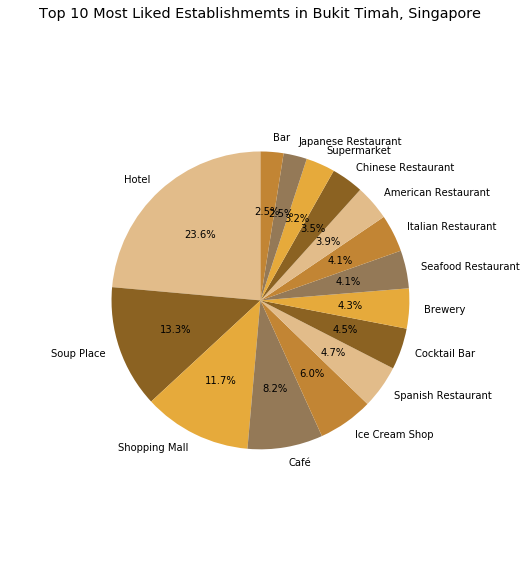

In [390]:
# Create a list of colors (from iWantHue)
colors = ["#e2bc8a",
"#8b6222",
"#e6aa3b",
"#947957",
"#c28534"]

# Create a pie chart
plt.pie(
    # using data total)arrests
    btimah_likes_display['Likes Count'],
    # with the labels being officer names
    labels=btimah_likes_display['Venue Category'],
    # with no shadows
    shadow=False,
    # with colors
    colors=colors,
    # with one slide exploded out
    startangle=90,
    # with the percent listed as a fraction
    autopct='%1.1f%%',
    )

# View the plot drop above
plt.axis('equal')
plt.title('Top 10 Most Liked Establishmemts in Bukit Timah, Singapore')

# View the plot
plt.tight_layout()
fig = plt.gcf()
fig.set_size_inches(10,9)
plt.show()


## Analyze how many existing Fitness Center are located within 5 km Radius of most Liked area in Geylang

In [391]:
btimah_venues

Neighbourhood  Neighbourhood Latitude  Neighbourhood Longitude  \
0       BALMORAL PLAZA                1.316440               103.835488   
1       BALMORAL PLAZA                1.316440               103.835488   
2       BALMORAL PLAZA                1.316440               103.835488   
3       BALMORAL PLAZA                1.316440               103.835488   
4            BELLERIVE                1.316987               103.830547   
..                 ...                     ...                      ...   
295  RAFFLES HOLLAND V                1.310564               103.796107   
296       WARNER COURT                1.309964               103.796331   
297       WILLYN VILLE                1.311861               103.796459   
298       WILLYN VILLE                1.311861               103.796459   
299       WILLYN VILLE                1.311861               103.796459   

                                     Venue  Venue Latitude  Venue Longitude  \
0                       Pu Dong Restaurant        1.316733       103.835619   
1    Smiths Authentic British Fish & Chips        1.316422       103.835780   
2                           Waffletown USA        1.316876       103.835491   
3                 The Straits Wine Company        1.316784       103.835538   
4                     Pool @ Orchard Hotel        1.316688       103.830661   
..                                     ...             ...              ...   
295                   Gastronomia Da Paolo        1.310585       103.795878   
296                        The Daily Scoop        1.310386       103.796411   
297                           Sunday Folks        1.311676       103.796848   
298                           Baker & Cook        1.311567       103.796741   
299                              % Arabica        1.311489       103.796650   

          Venue Category  Likes Count  
0     Chinese Restaurant           11  
1     Seafood Restaurant           30  
2    American Restaurant           25  
3               Wine Bar            0  
4                   Pool            0  
..                   ...          ...  
295                 Café            9  
296       Ice Cream Shop          124  
297       Ice Cream Shop          167  
298               Bakery           79  
299          Coffee Shop            5  

[300 rows x 8 columns]

In [392]:
btimah_ordered = btimah_venues.sort_values(by='Likes Count', ascending=False)
btimah_ordered

Neighbourhood  Neighbourhood Latitude  Neighbourhood Longitude  \
205  CHINATOWN POINT                1.284999               103.844697   
169    JUTA BUILDING                1.288712               103.847904   
142      AMCIS HOUSE                1.288681               103.847943   
240       SPI CENTRE                1.287931               103.846913   
179  RIVERSIDE POINT                1.289292               103.844168   
..               ...                     ...                      ...   
68   KASTURINA LODGE                1.296403               103.829758   
212       GREENRIDGE                1.335329               103.766158   
211    GRAND REGENCY                1.343306               103.768847   
210  GOODLUCK GARDEN                1.341030               103.768642   
59      CASA JERVOIS                1.294736               103.818989   

                                               Venue  Venue Latitude  \
205                                  Chinatown Point        1.285315   
169  Song Fa Bak Kut Teh 松发肉骨茶 (Song Fa Bak Kut Teh)        1.288980   
142  Song Fa Bak Kut Teh 松发肉骨茶 (Song Fa Bak Kut Teh)        1.288980   
240                               28 HongKong Street        1.287737   
179               Brewerkz Restaurant & Microbrewery        1.289527   
..                                               ...             ...   
68                                        Playground        1.296145   
212                             Sunset Blvd's Studio        1.335468   
211                             Gym @ Palm Residence        1.343197   
210                   Bus Stop 42221 (Good Luck Gdn)        1.340862   
59                                  99 Jervoise Road        1.294888   

     Venue Longitude Venue Category  Likes Count  
205       103.844675  Shopping Mall          566  
169       103.847693     Soup Place          497  
142       103.847693     Soup Place          497  
240       103.846934   Cocktail Bar          370  
179       103.844098        Brewery          357  
..               ...            ...          ...  
68        103.829678     Playground            0  
212       103.766141      Rock Club            0  
211       103.769154            Gym            0  
210       103.769050    Bus Station            0  
59        103.818986            Gym            0  

[300 rows x 8 columns]

In [393]:
btimah_ordered = btimah_ordered.head(30)
btimah_ordered

Neighbourhood  Neighbourhood Latitude  \
205                      CHINATOWN POINT                1.284999   
169                        JUTA BUILDING                1.288712   
142                          AMCIS HOUSE                1.288681   
240                           SPI CENTRE                1.287931   
179                      RIVERSIDE POINT                1.289292   
38                      SHANGRI-LA HOTEL                1.311224   
89           SAINT REGIS HOTEL SINGAPORE                1.305661   
186                        THE RIVERWALK                1.288972   
66                             HPL HOUSE                1.305724   
174               PARKROYAL ON PICKERING                1.285639   
17                            COMO HOUSE                1.308132   
110                         TANGLIN MALL                1.304843   
65                    FOUR SEASONS HOTEL                1.305175   
85                             RV SUITES                1.295605   
297                         WILLYN VILLE                1.311861   
285                      HOLLAND VILLAGE                1.311526   
182  SWISSOTEL MERCHANT COURT, SINGAPORE                1.288218   
73               MERLION (TOURISM COURT)                1.303666   
76      MINDEN CLUSTER (TANGLIN VILLAGE)                1.304835   
63     DEMPSEY CLUSTER (TANGLIN VILLAGE)                1.303523   
244                          THE CENTRAL                1.288839   
214       HOTEL CLOVER 5 HONGKONG STREET                1.287476   
252                    THE NOVELTY HOUSE                1.287738   
213                           GWP CENTRE                1.287400   
125                 THE REGENT SINGAPORE                1.304652   
296                         WARNER COURT                1.309964   
291                    RAFFLES HOLLAND V                1.310564   
127                 THE REGENT SINGAPORE                1.304652   
101                TANGLIN DELIVERY BASE                1.305612   
198                      CHINATOWN POINT                1.284999   

     Neighbourhood Longitude  \
205               103.844697   
169               103.847904   
142               103.847943   
240               103.846913   
179               103.844168   
38                103.826788   
89                103.826053   
186               103.848460   
66                103.828106   
174               103.846290   
17                103.827939   
110               103.823853   
65                103.828661   
85                103.829407   
297               103.796459   
285               103.794444   
182               103.845692   
73                103.823998   
76                103.813511   
63                103.809963   
244               103.846558   
214               103.847857   
252               103.847416   
213               103.847250   
125               103.824908   
296               103.796331   
291               103.796107   
127               103.824908   
101               103.822963   
198               103.844697   

                                                 Venue  Venue Latitude  \
205                                    Chinatown Point        1.285315   
169    Song Fa Bak Kut Teh 松发肉骨茶 (Song Fa Bak Kut Teh)        1.288980   
142    Song Fa Bak Kut Teh 松发肉骨茶 (Song Fa Bak Kut Teh)        1.288980   
240                                 28 HongKong Street        1.287737   
179                 Brewerkz Restaurant & Microbrewery        1.289527   
38                                    Shangri-La Hotel        1.311232   
89                             The St. Regis Singapore        1.305546   
186  Jumbo Seafood Gallery 珍宝海鮮樓 (Jumbo Seafood Gal...        1.289276   
66                            Hard Rock Café Singapore        1.305777   
174                               Parkroyal Collection        1.285754   
17                             Orchard Hotel Singapore        1.307882   
110                                  

In [394]:
def get_nearby_liked(center_lat, center_long , test_point_lat, test_point_long):
    radius = 5 
    df_nearby = pd.DataFrame(columns=['Latitude', 'Longitude'])
    
    center_point = [{'lat': center_lat, 'lng': center_long}]
    test_point = [{'lat': test_point_lat, 'lng': test_point_long}]
    
    center_point_tuple = tuple(center_point[0].values()) 
    test_point_tuple = tuple(test_point[0].values())

    dis = distance.distance(center_point_tuple, test_point_tuple).km

    if dis <= radius:
        df_nearby = df_nearby.append({'Latitude': center_lat, 'Longitude': center_long}, ignore_index=True)
        
    return df_nearby

In [395]:
df_nearby_like_btimah = pd.DataFrame(columns=['Latitude', 'Longitude'])
df_temp = pd.DataFrame(columns=['Latitude', 'Longitude'])

for rows_existing in df_existing.itertuples():
    for rows_top_btimah in btimah_ordered.itertuples():
        df_temp = get_nearby_liked(rows_existing[1], rows_existing[2], rows_top_btimah[5], rows_top_btimah[6])
        df_nearby_like_btimah = df_nearby_like_btimah.append(df_temp, ignore_index=True)


In [396]:
df_nearby_like_btimah

Latitude         Longitude
0     1.27811388348071  103.844202079592
1     1.27811388348071  103.844202079592
2     1.27811388348071  103.844202079592
3     1.27811388348071  103.844202079592
4     1.27811388348071  103.844202079592
...                ...               ...
2872  1.29151478613339  103.844586298874
2873  1.29151478613339  103.844586298874
2874  1.29151478613339  103.844586298874
2875  1.29151478613339  103.844586298874
2876  1.29151478613339  103.844586298874

[2877 rows x 2 columns]

In [455]:
df_nearby_like_btimah = df_nearby_like_btimah.drop_duplicates(subset=['Latitude', 'Longitude'])
df_nearby_like_btimah

Latitude   Longitude
0     1.278114  103.844202
26    1.334220  103.795898
42    1.309922  103.862091
66    1.301257  103.841150
92    1.280895  103.851677
...        ...         ...
2719  1.300504  103.859384
2743  1.278435  103.843684
2769  1.278397  103.843674
2795  1.288481  103.849145
2851  1.291515  103.844586

[111 rows x 2 columns]

In [456]:
df_nearby_like_btimah["Latitude"] = df_nearby_like_btimah["Latitude"].astype("float")
df_nearby_like_btimah["Longitude"] = df_nearby_like_btimah["Longitude"].astype("float")
df_nearby_like_btimah.dtypes

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


Latitude     float64
Longitude    float64
dtype: object

### Add the location of the existing fitness center to nearest most liked establishments in Bukit Timah to the Folium Map

In [458]:
for lat, lng in zip(df_nearby_like_btimah['Latitude'], df_nearby_like_btimah['Longitude']):
    label = '{}, {}'.format(general_loc, neighbourhood)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='red',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_btimah)  
    
map_btimah

## Analyze most common venue around Bukit Timah, Singapore area

In [400]:
btimah_venues.groupby('Neighbourhood').count()

Neighbourhood Latitude  Neighbourhood Longitude  Venue  \
Neighbourhood                                                               
896 DUNEARN                             7                        7      7   
AMCIS HOUSE                             1                        1      1   
ANGSANA HOUSE                           1                        1      1   
BALMORAL PLAZA                          4                        4      4   
BANYAN TREE HOUSE                       1                        1      1   
...                                   ...                      ...    ...   
VENTUNO BALMORAL                        1                        1      1   
WARNER COURT                            1                        1      1   
WILLYN VILLE                            3                        3      3   
WOH HUP BUILDING                        1                        1      1   
WOOLLERTON PARK                         1                        1      1   

                   Venue Latitude  Venue Longitude  Venue Category  \
Neighbourhood                                                        
896 DUNEARN                     7                7               7   
AMCIS HOUSE                     1                1               1   
ANGSANA HOUSE                   1                1               1   
BALMORAL PLAZA                  4                4               4   
BANYAN TREE HOUSE               1                1               1   
...                           ...              ...             ...   
VENTUNO BALMORAL                1                1               1   
WARNER COURT                    1                1               1   
WILLYN VILLE                    3                3               3   
WOH HUP BUILDING                1                1               1   
WOOLLERTON PARK                 1                1               1   

                   Likes Count  
Neighbourhood                   
896 DUNEARN                  7  
AMCIS HOUSE                  1  
ANGSANA HOUSE                1  
BALMORAL PLAZA               4  
BANYAN TREE HOUSE            1  
...                        ...  
VENTUNO BALMORAL             1  
WARNER COURT                 1  
WILLYN VILLE                 3  
WOH HUP BUILDING             1  
WOOLLERTON PARK              1  

[131 rows x 7 columns]

In [401]:
print('There are {} uniques categories.'.format(len(btimah_venues['Venue Category'].unique())))

There are 94 uniques categories.


In [402]:
# one hot encoding
btimah_onehot = pd.get_dummies(btimah_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
btimah_onehot['Neighbourhood'] = btimah_venues['Neighbourhood'] 

# move neighborhood column to the first column
fixed_columns = [btimah_onehot.columns[-1]] + list(btimah_onehot.columns[:-1])
btimah_onehot = btimah_onehot[fixed_columns]

btimah_onehot.head()

Neighbourhood  American Restaurant  Asian Restaurant  Bakery  Bar  \
0  BALMORAL PLAZA                    0                 0       0    0   
1  BALMORAL PLAZA                    0                 0       0    0   
2  BALMORAL PLAZA                    1                 0       0    0   
3  BALMORAL PLAZA                    0                 0       0    0   
4       BELLERIVE                    0                 0       0    0   

   Baseball Field  Beer Store  Belgian Restaurant  Bistro  Bookstore  ...  \
0               0           0                   0       0          0  ...   
1               0           0                   0       0          0  ...   
2               0           0                   0       0          0  ...   
3               0           0                   0       0          0  ...   
4               0           0                   0       0          0  ...   

   Sushi Restaurant  Tea Room  Tennis Court  Thai Restaurant  Theater  \
0                 0         0             0                0        0   
1                 0         0             0                0        0   
2                 0         0             0                0        0   
3                 0         0             0                0        0   
4                 0         0             0                0        0   

   Toy / Game Store  Vegetarian / Vegan Restaurant  Vietnamese Restaurant  \
0                 0                              0                      0   
1                 0                              0                      0   
2                 0                              0                      0   
3                 0                              0                      0   
4                 0                              0                      0   

   Wine Bar  Wine Shop  
0         0          0  
1         0          0  
2         0          0  
3         1          0  
4         0          0  

[5 rows x 95 columns]

In [403]:
btimah_grouped = btimah_onehot.groupby('Neighbourhood').mean().reset_index()
btimah_grouped

Neighbourhood  American Restaurant  Asian Restaurant    Bakery  Bar  \
0          896 DUNEARN                 0.00               0.0  0.000000  0.0   
1          AMCIS HOUSE                 0.00               0.0  0.000000  0.0   
2        ANGSANA HOUSE                 0.00               0.0  0.000000  0.0   
3       BALMORAL PLAZA                 0.25               0.0  0.000000  0.0   
4    BANYAN TREE HOUSE                 0.00               0.0  0.000000  0.0   
..                 ...                  ...               ...       ...  ...   
126   VENTUNO BALMORAL                 0.00               0.0  0.000000  0.0   
127       WARNER COURT                 0.00               0.0  0.000000  0.0   
128       WILLYN VILLE                 0.00               0.0  0.333333  0.0   
129   WOH HUP BUILDING                 0.00               0.0  0.000000  0.0   
130    WOOLLERTON PARK                 0.00               0.0  0.000000  0.0   

     Baseball Field  Beer Store  Belgian Restaurant  Bistro  Bookstore  ...  \
0               0.0         0.0                 0.0     0.0        0.0  ...   
1               0.0         0.0                 0.0     0.0        0.0  ...   
2               0.0         0.0                 0.0     0.0        0.0  ...   
3               0.0         0.0                 0.0     0.0        0.0  ...   
4               0.0         0.0                 0.0     0.0        0.0  ...   
..              ...         ...                 ...     ...        ...  ...   
126             0.0         0.0                 0.0     0.0        0.0  ...   
127             0.0         0.0                 0.0     0.0        0.0  ...   
128             0.0         0.0                 0.0     0.0        0.0  ...   
129             0.0         0.0                 0.0     0.0        0.0  ...   
130             0.0         0.0                 0.0     0.0        0.0  ...   

     Sushi Restaurant  Tea Room  Tennis Court  Thai Restaurant  Theater  \
0                 0.0       0.0           0.0              0.0      0.0   
1                 0.0       0.0           0.0              0.0      0.0   
2                 0.0       0.0           0.0              1.0      0.0   
3                 0.0       0.0           0.0              0.0      0.0   
4                 0.0       0.0           0.0              0.0      0.0   
..                ...       ...           ...              ...      ...   
126               0.0       0.0           0.0              0.0      0.0   
127               0.0       0.0           0.0              0.0      0.0   
128               0.0       0.0           0.0              0.0      0.0   
129               0.0       0.0           0.0              0.0      0.0   
130               0.0       0.0           0.0              0.0      0.0   

     Toy / Game Store  Vegetarian / Vegan Restaurant  Vietnamese Restaurant  \
0                 0.0                            0.0                    0.0   
1                 0.0                            0.0                    0.0   
2                 0.0                            0.0                    0.0   
3                 0.0                            0.0                    0.0   
4                 0.0                            0.0                    0.0   
..                ...                            ...                    ...   
126               0.0                            0.0                    0.0   
127               0.0                            0.0                    0.0   
128               0.0                            0.0                    0.0   
129               0.0                            0.0                    0.0   
130               0.0                            0.0                    0.0   

     Wine Bar  Wine Shop  
0        0.00        0.0  
1        0.00        0.0  
2        0.00        0.0  
3        0.25        0.0  
4        0.00        0.0  
..        ...        ...  
126      0.00        0.0  
127      0.00        0.0  
128   

In [404]:
num_top_venues = 5

for hood in geylang_grouped['Neighbourhood']:
    print("----"+hood+"----")
    temp = geylang_grouped[geylang_grouped['Neighbourhood'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

----ATRIX----
                  venue  freq
0  Kitchen Supply Store   1.0
1   American Restaurant   0.0
2                Office   0.0
3          Noodle House   0.0
4             Multiplex   0.0


----AUTOMOBILE MEGAMART----
                   venue  freq
0     Chinese Restaurant   0.5
1            Bus Station   0.5
2    American Restaurant   0.0
3  Performing Arts Venue   0.0
4                 Office   0.0


----AZ @ PAYA LEBAR----
                  venue  freq
0             Locksmith   1.0
1   American Restaurant   0.0
2  Kitchen Supply Store   0.0
3                Office   0.0
4          Noodle House   0.0


----CAMELLIA LODGE----
           venue  freq
0     Art Museum   1.0
1      Juice Bar   0.0
2   Noodle House   0.0
3      Multiplex   0.0
4  Moving Target   0.0


----CENTRA HEIGHTS----
                           venue  freq
0  Vegetarian / Vegan Restaurant   1.0
1           Kitchen Supply Store   0.0
2                         Office   0.0
3                   Noodle House   0.0
4

In [405]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [406]:
#display the top 10 most common venues by neighbourhood
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighbourhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Neighbourhood'] = btimah_grouped['Neighbourhood']

for ind in np.arange(btimah_grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(btimah_grouped.iloc[ind, :], num_top_venues)

neighborhoods_venues_sorted.head()

Neighbourhood 1st Most Common Venue 2nd Most Common Venue  \
0        896 DUNEARN  Gym / Fitness Center          Dance Studio   
1        AMCIS HOUSE            Soup Place             Wine Shop   
2      ANGSANA HOUSE       Thai Restaurant             Wine Shop   
3     BALMORAL PLAZA   American Restaurant    Seafood Restaurant   
4  BANYAN TREE HOUSE          Dessert Shop             Wine Shop   

  3rd Most Common Venue 4th Most Common Venue 5th Most Common Venue  \
0     Indian Restaurant                  Café           Supermarket   
1           Coffee Shop        Cosmetics Shop          Cupcake Shop   
2           Escape Room        Cosmetics Shop          Cupcake Shop   
3    Chinese Restaurant              Wine Bar                   Bar   
4  Fast Food Restaurant          Cupcake Shop          Dance Studio   

  6th Most Common Venue 7th Most Common Venue 8th Most Common Venue  \
0     Korean Restaurant  Fast Food Restaurant             Wine Shop   
1          Dance Studio         Deli / Bodega          Dessert Shop   
2          Dance Studio         Deli / Bodega          Dessert Shop   
3        Baseball Field          Dance Studio         Deli / Bodega   
4         Deli / Bodega    Dim Sum Restaurant                 Diner   

  9th Most Common Venue 10th Most Common Venue  
0   Dumpling Restaurant           Cupcake Shop  
1    Dim Sum Restaurant                  Diner  
2    Dim Sum Restaurant                  Diner  
3          Dessert Shop     Dim Sum Restaurant  
4       Doctor's Office    Dumpling Restaurant

In [437]:
#run k clustering algorithm
#set number of clusters
kclusters = 5

btimah_grouped_clustering = btimah_grouped.drop('Neighbourhood', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(btimah_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10] 

array([3, 3, 3, 3, 3, 3, 3, 2, 3, 3], dtype=int32)

In [408]:
neighborhoods_venues_sorted.shape

(131, 11)

In [432]:
btimah_merged = btimah_data
btimah_merged.shape

(562, 11)

In [421]:
neighborhoods_venues_sorted.dtypes

Neighbourhood             object
1st Most Common Venue     object
2nd Most Common Venue     object
3rd Most Common Venue     object
4th Most Common Venue     object
5th Most Common Venue     object
6th Most Common Venue     object
7th Most Common Venue     object
8th Most Common Venue     object
9th Most Common Venue     object
10th Most Common Venue    object
dtype: object

In [438]:
# merge manhattan_grouped with manhattan_data to add latitude/longitude for each neighborhood
neighborhoods_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)
btimah_merged = btimah_data

btimah_merged = btimah_merged.join(neighborhoods_venues_sorted.set_index('Neighbourhood'), on='Neighbourhood')

btimah_merged.head() # check the last columns!

postal  latitude  longtitude          searchval blk_no     road_name  \
0  258482  1.306641  103.821287          19 NASSIM     19   NASSIM HILL   
1  258502  1.306910  103.820683           8 NAPIER      8   NAPIER ROAD   
2  259947  1.309210  103.828264         ARDMORE II      2  ARDMORE PARK   
3  259955  1.309511  103.829220       ARDMORE PARK      9  ARDMORE PARK   
4  259954  1.310071  103.828595  ARDMORE RESIDENCE      7  ARDMORE PARK   

       Neighbourhood                                            address  area  \
0          19 NASSIM          19 NASSIM HILL 19 NASSIM SINGAPORE 258482    25   
1           8 NAPIER            8 NAPIER ROAD 8 NAPIER SINGAPORE 258502    25   
2         ARDMORE II         2 ARDMORE PARK ARDMORE II SINGAPORE 259947    25   
3       ARDMORE PARK       9 ARDMORE PARK ARDMORE PARK SINGAPORE 259955    25   
4  ARDMORE RESIDENCE  7 ARDMORE PARK ARDMORE RESIDENCE SINGAPORE 259954    25   

   Postal district  ... 1st Most Common Venue  2nd Most Common Venue  \
0               10  ...                   NaN                    NaN   
1               10  ...                   NaN                    NaN   
2               10  ...                   NaN                    NaN   
3               10  ...                   NaN                    NaN   
4               10  ...                   NaN                    NaN   

  3rd Most Common Venue 4th Most Common Venue 5th Most Common Venue  \
0                   NaN                   NaN                   NaN   
1                   NaN                   NaN                   NaN   
2                   NaN                   NaN                   NaN   
3                   NaN                   NaN                   NaN   
4                   NaN                   NaN                   NaN   

  6th Most Common Venue 7th Most Common Venue 8th Most Common Venue  \
0                   NaN                   NaN                   NaN   
1                   NaN                   NaN                   NaN   
2                   NaN                   NaN                   NaN   
3                   NaN                   NaN                   NaN   
4                   NaN                   NaN                   NaN   

  9th Most Common Venue 10th Most Common Venue  
0                   NaN                    NaN  
1                   NaN                    NaN  
2                   NaN                    NaN  
3                   NaN                    NaN  
4                   NaN                    NaN  

[5 rows x 22 columns]

### Cluster 1 - Health & Dining

In [446]:
btimah_merged.loc[btimah_merged['Cluster Labels'] == 0, btimah_merged.columns[[1] + list(range(5, btimah_merged.shape[1]))]]

latitude               road_name    Neighbourhood  \
150  1.316146         WOOLLERTON PARK  WOOLLERTON PARK   
158  1.294736            JERVOIS ROAD     CASA JERVOIS   
183  1.294896            JERVOIS ROAD    JERVOIS GROVE   
270  1.347135  UPPER BUKIT TIMAH VIEW    BUKIT REGENCY   
297  1.289292           MERCHANT ROAD  RIVERSIDE POINT   
309  1.333847        BUKIT TIMAH ROAD        THE NEXUS   
337  1.343306          JALAN RAJAWALI    GRAND REGENCY   
368  1.343270          JALAN RAJAWALI   PALM RESIDENCE   
403  1.344145     JALAN JURONG KECHIL     THE HILLFORD   

                                               address  area  Postal district  \
150  30 WOOLLERTON PARK WOOLLERTON PARK SINGAPORE 2...    25               10   
158      99 JERVOIS ROAD CASA JERVOIS SINGAPORE 249055    24               10   
183    100 JERVOIS ROAD JERVOIS GROVE SINGAPORE 249056    24               10   
270  1 UPPER BUKIT TIMAH VIEW BUKIT REGENCY SINGAPO...    58               21   
297  30 MERCHANT ROAD RIVERSIDE POINT SINGAPORE 058282    58               21   
309    951 BUKIT TIMAH ROAD THE NEXUS SINGAPORE 589650    58               21   
337    9 JALAN RAJAWALI GRAND REGENCY SINGAPORE 598431    59               21   
368   7 JALAN RAJAWALI PALM RESIDENCE SINGAPORE 598429    59               21   
403  178 JALAN JURONG KECHIL THE HILLFORD SINGAPORE...    59               21   

                                 General location  Cluster Labels  \
150   Ardmore, Bukit Timah, Holland Road, Tanglin             0.0   
158   Ardmore, Bukit Timah, Holland Road, Tanglin             0.0   
183   Ardmore, Bukit Timah, Holland Road, Tanglin             0.0   
270  Upper Bukit Timah, Clementi Park, Ulu Pandan             0.0   
297  Upper Bukit Timah, Clementi Park, Ulu Pandan             0.0   
309  Upper Bukit Timah, Clementi Park, Ulu Pandan             0.0   
337  Upper Bukit Timah, Clementi Park, Ulu Pandan             0.0   
368  Upper Bukit Timah, Clementi Park, Ulu Pandan             0.0   
403  Upper Bukit Timah, Clementi Park, Ulu Pandan             0.0   

    1st Most Common Venue 2nd Most Common Venue 3rd Most Common Venue  \
150                   Gym             Wine Shop  Fast Food Restaurant   
158                   Gym             Wine Shop  Fast Food Restaurant   
183                   Gym             Wine Shop  Fast Food Restaurant   
270                   Gym             Wine Shop  Fast Food Restaurant   
297                   Gym               Brewery             Wine Shop   
309                   Gym             Wine Shop  Fast Food Restaurant   
337                   Gym             Wine Shop  Fast Food Restaurant   
368                   Gym             Wine Shop  Fast Food Restaurant   
403                  Pool                   Gym             Wine Shop   

    4th Most Common Venue 5th Most Common Venue 6th Most Common Venue  \
150          Cupcake Shop          Dance Studio         Deli / Bodega   
158          Cupcake Shop          Dance Studio         Deli / Bodega   
183          Cupcake Shop          Dance Studio         Deli / Bodega   
270          Cupcake Shop          Dance Studio         Deli / Bodega   
297  Fast Food Restaurant          Cupcake Shop          Dance Studio   
309          Cupcake Shop          Dance Studio         Deli / Bodega   
337          Cupcake Shop          Dance Studio         Deli / Bodega   
368          Cupcake Shop          Dance Studio         Deli / Bodega   
403   Dumpling Restaurant        Cosmetics Shop          Cupcake Shop   

    7th Most Common Venue 8th Most Common Venue 9th Most Common Venue  \
150          Dessert Shop    Dim Sum Restaurant                 Diner   
158          Dessert Shop    Dim Sum Restaurant                 Diner   
183          Dessert Shop    Dim Sum Restaurant                 Diner   
270          Dessert Shop    Dim Sum Restaurant                 Diner   
297         Deli / Bodega          Dessert Shop    Dim Sum Restaurant   
309          Dessert S

### Cluster 2- Health, Dining & Transport

In [447]:
btimah_merged.loc[btimah_merged['Cluster Labels'] == 1, btimah_merged.columns[[1] + list(range(5, btimah_merged.shape[1]))]]

latitude           road_name    Neighbourhood  \
335  1.341030       TOH TUCK ROAD  GOODLUCK GARDEN   
463  1.323473    LIM TAI SEE WALK    SELBY GARDENS   
473  1.321040  TAN KIM CHENG ROAD        THE SIENA   
507  1.311288       GHIM MOH ROAD     HDB-GHIM MOH   

                                               address  area  Postal district  \
335  34 TOH TUCK ROAD GOODLUCK GARDEN SINGAPORE 596712    59               21   
463  25 LIM TAI SEE WALK SELBY GARDENS SINGAPORE 26...    26               10   
473   31 TAN KIM CHENG ROAD THE SIENA SINGAPORE 266630    26               10   
507      7 GHIM MOH ROAD HDB-GHIM MOH SINGAPORE 270007    27               10   

                                 General location  Cluster Labels  \
335  Upper Bukit Timah, Clementi Park, Ulu Pandan             1.0   
463   Ardmore, Bukit Timah, Holland Road, Tanglin             1.0   
473   Ardmore, Bukit Timah, Holland Road, Tanglin             1.0   
507   Ardmore, Bukit Timah, Holland Road, Tanglin             1.0   

    1st Most Common Venue 2nd Most Common Venue 3rd Most Common Venue  \
335           Bus Station             Wine Shop           College Gym   
463           Bus Station             Wine Shop           College Gym   
473           Bus Station             Wine Shop           College Gym   
507           Bus Station             Wine Shop           College Gym   

    4th Most Common Venue 5th Most Common Venue 6th Most Common Venue  \
335          Cupcake Shop          Dance Studio         Deli / Bodega   
463          Cupcake Shop          Dance Studio         Deli / Bodega   
473          Cupcake Shop          Dance Studio         Deli / Bodega   
507          Cupcake Shop          Dance Studio         Deli / Bodega   

    7th Most Common Venue 8th Most Common Venue 9th Most Common Venue  \
335          Dessert Shop    Dim Sum Restaurant                 Diner   
463          Dessert Shop    Dim Sum Restaurant                 Diner   
473          Dessert Shop    Dim Sum Restaurant                 Diner   
507          Dessert Shop    Dim Sum Restaurant                 Diner   

    10th Most Common Venue  
335        Doctor's Office  
463        Doctor's Office  
473        Doctor's Office  
507        Doctor's Office

### Cluster 3 - Beauty, Health & Dining

In [448]:
btimah_merged.loc[btimah_merged['Cluster Labels'] == 2, btimah_merged.columns[[1] + list(range(5, btimah_merged.shape[1]))]]

latitude       road_name                   Neighbourhood  \
16   1.316987  KENG CHIN ROAD                       BELLERIVE   
41   1.316490   EWE BOON ROAD                 EWE BOON REGENT   
145  1.315959   BALMORAL ROAD                VENTUNO BALMORAL   
218  1.300862     GRANGE ROAD                  PARKVIEW ÉCLAT   
235  1.298110     GRANGE ROAD                    SPRING GROVE   
251  1.301375   GRANGE GARDEN                      THE GRANGE   
299  1.346126   HINDHEDE WALK                   SOUTHHAVEN II   
371  1.319994   PANDAN VALLEY  PANDAN VALLEY, CAMELIA TERRACE   
515  1.309831    HOLLAND HILL              HOLLAND HILL LODGE   
516  1.309587    HOLLAND HILL               HOLLAND HILL PARK   

                                               address  area  Postal district  \
16         9 KENG CHIN ROAD BELLERIVE SINGAPORE 258711    25               10   
41   31 EWE BOON ROAD EWE BOON REGENT SINGAPORE 259332    25               10   
145  21 BALMORAL ROAD VENTUNO BALMORAL SINGAPORE 25...    25               10   
218    138 GRANGE ROAD PARKVIEW ÉCLAT SINGAPORE 249617    24               10   
235       53 GRANGE ROAD SPRING GROVE SINGAPORE 249565    24               10   
251        1 GRANGE GARDEN THE GRANGE SINGAPORE 249631    24               10   
299    31 HINDHEDE WALK SOUTHHAVEN II SINGAPORE 587967    58               21   
371  1 PANDAN VALLEY PANDAN VALLEY, CAMELIA TERRACE...    59               21   
515  5 HOLLAND HILL HOLLAND HILL LODGE SINGAPORE 27...    27               10   
516  7 HOLLAND HILL HOLLAND HILL PARK SINGAPORE 278731    27               10   

                                 General location  Cluster Labels  \
16    Ardmore, Bukit Timah, Holland Road, Tanglin             2.0   
41    Ardmore, Bukit Timah, Holland Road, Tanglin             2.0   
145   Ardmore, Bukit Timah, Holland Road, Tanglin             2.0   
218   Ardmore, Bukit Timah, Holland Road, Tanglin             2.0   
235   Ardmore, Bukit Timah, Holland Road, Tanglin             2.0   
251   Ardmore, Bukit Timah, Holland Road, Tanglin             2.0   
299  Upper Bukit Timah, Clementi Park, Ulu Pandan             2.0   
371  Upper Bukit Timah, Clementi Park, Ulu Pandan             2.0   
515   Ardmore, Bukit Timah, Holland Road, Tanglin             2.0   
516   Ardmore, Bukit Timah, Holland Road, Tanglin             2.0   

    1st Most Common Venue 2nd Most Common Venue 3rd Most Common Venue  \
16                   Pool             Wine Shop           Coffee Shop   
41                   Pool             Wine Shop           Coffee Shop   
145                  Pool             Wine Shop           Coffee Shop   
218                  Pool         Shopping Mall             Wine Shop   
235                  Pool             Wine Shop           Coffee Shop   
251                  Pool             Wine Shop           Coffee Shop   
299                  Pool             Wine Shop           Coffee Shop   
371                  Pool             Wine Shop           Coffee Shop   
515                  Pool             Wine Shop           Coffee Shop   
516                  Pool             Wine Shop           Coffee Shop   

    4th Most Common Venue 5th Most Common Venue 6th Most Common Venue  \
16         Cosmetics Shop          Cupcake Shop          Dance Studio   
41         Cosmetics Shop          Cupcake Shop          Dance Studio   
145        Cosmetics Shop          Cupcake Shop          Dance Studio   
218   Dumpling Restaurant        Cosmetics Shop          Cupcake Shop   
235        Cosmetics Shop          Cupcake Shop          Dance Studio   
251        Cosmetics Shop          Cupcake Shop          Dance Studio   
299        Cosmetics Shop          Cupcake Shop          Dance Studio   
371        Cosmetics Shop          Cupcake Shop          Dance Studio   
515        Cosmetics Shop          Cupcake Shop          Dance Studio   
516        Cosmetics Shop          Cupcake Shop          Dance Studio   

    7th Most Common Venue 8th

### Cluster 4 - Dining, Entertainment, Health

In [449]:
btimah_merged.loc[btimah_merged['Cluster Labels'] == 3, btimah_merged.columns[[1] + list(range(5, btimah_merged.shape[1]))]]

latitude         road_name                 Neighbourhood  \
11   1.316440  BUKIT TIMAH ROAD                BALMORAL PLAZA   
18   1.318921  BUKIT TIMAH ROAD                       BLOCK B   
29   1.322573  BUKIT TIMAH ROAD                   CLUNY COURT   
40   1.318325  BUKIT TIMAH ROAD          EU TONG SEN BUILDING   
54   1.307428       NAPIER ROAD           GLENEAGLES HOSPITAL   
..        ...               ...                           ...   
519  1.310278    HOLLAND AVENUE  HOLLAND ROAD SHOPPING CENTRE   
521  1.311526    LORONG MAMBONG               HOLLAND VILLAGE   
541  1.310564    HOLLAND AVENUE             RAFFLES HOLLAND V   
560  1.309964    HOLLAND AVENUE                  WARNER COURT   
561  1.311861    HOLLAND AVENUE                  WILLYN VILLE   

                                               address  area  Postal district  \
11   271 BUKIT TIMAH ROAD BALMORAL PLAZA SINGAPORE ...    25               10   
18       469 BUKIT TIMAH ROAD BLOCK B SINGAPORE 259756    25               10   
29   501 BUKIT TIMAH ROAD CLUNY COURT SINGAPORE 259760    25               10   
40   469G BUKIT TIMAH ROAD EU TONG SEN BUILDING SIN...    25               10   
54   6A NAPIER ROAD GLENEAGLES HOSPITAL SINGAPORE 2...    25               10   
..                                                 ...   ...              ...   
519  211 HOLLAND AVENUE HOLLAND ROAD SHOPPING CENTR...    27               10   
521  29 LORONG MAMBONG HOLLAND VILLAGE SINGAPORE 27...    27               10   
541  118 HOLLAND AVENUE RAFFLES HOLLAND V SINGAPORE...    27               10   
560   110 HOLLAND AVENUE WARNER COURT SINGAPORE 278966    27               10   
561     1 HOLLAND AVENUE WILLYN VILLE SINGAPORE 278965    27               10   

                                General location  Cluster Labels  \
11   Ardmore, Bukit Timah, Holland Road, Tanglin             3.0   
18   Ardmore, Bukit Timah, Holland Road, Tanglin             3.0   
29   Ardmore, Bukit Timah, Holland Road, Tanglin             3.0   
40   Ardmore, Bukit Timah, Holland Road, Tanglin             3.0   
54   Ardmore, Bukit Timah, Holland Road, Tanglin             3.0   
..                                           ...             ...   
519  Ardmore, Bukit Timah, Holland Road, Tanglin             3.0   
521  Ardmore, Bukit Timah, Holland Road, Tanglin             3.0   
541  Ardmore, Bukit Timah, Holland Road, Tanglin             3.0   
560  Ardmore, Bukit Timah, Holland Road, Tanglin             3.0   
561  Ardmore, Bukit Timah, Holland Road, Tanglin             3.0   

    1st Most Common Venue 2nd Most Common Venue 3rd Most Common Venue  \
11    American Restaurant    Seafood Restaurant    Chinese Restaurant   
18            College Gym             Wine Shop  Fast Food Restaurant   
29           Cupcake Shop            Steakhouse          Burger Joint   
40     Chinese Restaurant             Wine Shop           College Gym   
54                   Café           Flower Shop             Wine Shop   
..                    ...                   ...                   ...   
519              Pharmacy        Cosmetics Shop          Noodle House   
521                   Bar        Ice Cream Shop     Indian Restaurant   
541                Bakery                  Café                   Spa   
560        Ice Cream Shop             Wine Shop  Fast Food Restaurant   
561           Coffee Shop                Bakery        Ice Cream Shop   

    4th Most Common Venue 5th Most Common Venue 6th Most Common Venue  \
11               Wine Bar                   Bar        Baseball Field   
18           Cupcake Shop          Dance Studio         Deli / Bodega   
29                 Bakery         Shopping Mall             Gastropub   
40           Cupcake Shop          Dance Studio         Deli / Bodega   
54            Escape Room          Cupcake Shop          Dance Studio   
..                    ...                   ...                   ...   
519           Supermarket   Dumpling Restauran

### Cluster 5 Hotel, Dining, Health & Entertainment

In [450]:
btimah_merged.loc[btimah_merged['Cluster Labels'] == 4, btimah_merged.columns[[1] + list(range(5, btimah_merged.shape[1]))]]

latitude               road_name                        Neighbourhood  \
31   1.308132       ORANGE GROVE ROAD                           COMO HOUSE   
44   1.317699        BUKIT TIMAH ROAD                   FERRELL RESIDENCES   
83   1.313869            STEVENS ROAD         NOVOTEL SINGAPORE ON STEVENS   
107  1.311224       ORANGE GROVE ROAD                     SHANGRI-LA HOTEL   
120  1.315466       BALMORAL CRESCENT                  THE BALMORAL SPRING   
165  1.305175       ORCHARD BOULEVARD                   FOUR SEASONS HOTEL   
201  1.303666     ORCHARD SPRING LANE              MERLION (TOURISM COURT)   
292  1.288081           MERCHANT ROAD                 PARK REGIS SINGAPORE   
293  1.285639  UPPER PICKERING STREET               PARKROYAL ON PICKERING   
302  1.288218           MERCHANT ROAD  SWISSOTEL MERCHANT COURT, SINGAPORE   
312  1.286923       SOUTH BRIDGE ROAD                         TKH BUILDING   
345  1.287476         HONGKONG STREET       HOTEL CLOVER 5 HONGKONG STREET   

                                               address  area  Postal district  \
31    6B ORANGE GROVE ROAD COMO HOUSE SINGAPORE 258332    25               10   
44   327 BUKIT TIMAH ROAD FERRELL RESIDENCES SINGAP...    25               10   
83   28 STEVENS ROAD NOVOTEL SINGAPORE ON STEVENS S...    25               10   
107  22 ORANGE GROVE ROAD SHANGRI-LA HOTEL SINGAPOR...    25               10   
120  3 BALMORAL CRESCENT THE BALMORAL SPRING SINGAP...    25               10   
165  190 ORCHARD BOULEVARD FOUR SEASONS HOTEL SINGA...    24               10   
201  1 ORCHARD SPRING LANE MERLION (TOURISM COURT) ...    24               10   
292  23 MERCHANT ROAD PARK REGIS SINGAPORE SINGAPOR...    58               21   
293  3 UPPER PICKERING STREET PARKROYAL ON PICKERIN...    58               21   
302  20 MERCHANT ROAD SWISSOTEL MERCHANT COURT, SIN...    58               21   
312  78 SOUTH BRIDGE ROAD TKH BUILDING SINGAPORE 05...    58               21   
345  5 HONGKONG STREET HOTEL CLOVER 5 HONGKONG STRE...    59               21   

                                 General location  Cluster Labels  \
31    Ardmore, Bukit Timah, Holland Road, Tanglin             4.0   
44    Ardmore, Bukit Timah, Holland Road, Tanglin             4.0   
83    Ardmore, Bukit Timah, Holland Road, Tanglin             4.0   
107   Ardmore, Bukit Timah, Holland Road, Tanglin             4.0   
120   Ardmore, Bukit Timah, Holland Road, Tanglin             4.0   
165   Ardmore, Bukit Timah, Holland Road, Tanglin             4.0   
201   Ardmore, Bukit Timah, Holland Road, Tanglin             4.0   
292  Upper Bukit Timah, Clementi Park, Ulu Pandan             4.0   
293  Upper Bukit Timah, Clementi Park, Ulu Pandan             4.0   
302  Upper Bukit Timah, Clementi Park, Ulu Pandan             4.0   
312  Upper Bukit Timah, Clementi Park, Ulu Pandan             4.0   
345  Upper Bukit Timah, Clementi Park, Ulu Pandan             4.0   

    1st Most Common Venue 2nd Most Common Venue 3rd Most Common Venue  \
31                  Hotel    Dim Sum Restaurant  Fast Food Restaurant   
44                  Hotel  Fast Food Restaurant          Cupcake Shop   
83                  Hotel                 Diner      Malay Restaurant   
107                 Hotel  Cantonese Restaurant          Tennis Court   
120                 Hotel  Fast Food Restaurant          Cupcake Shop   
165                 Hotel  Fast Food Restaurant          Cupcake Shop   
201                 Hotel            Restaurant           Coffee Shop   
292                 Hotel  Fast Food Restaurant          Cupcake Shop   
293                 Hotel             Hotel Bar          Noodle House   
302                 Hotel  Fast Food Restaurant          Cupcake Shop   
312                 Hotel             Nightclub           Escape Room   
345                 Hotel    Spanish Restaurant     Hainan Restaurant   

    4th Most Common Venue 5th Most Common Venue 6th Most Common Venue  \
31           Cu

In [451]:
btimah_merged.dtypes

postal                      int64
latitude                  float64
longtitude                float64
searchval                  object
blk_no                     object
road_name                  object
Neighbourhood              object
address                    object
area                        int64
Postal district             int64
General location           object
Cluster Labels            float64
1st Most Common Venue      object
2nd Most Common Venue      object
3rd Most Common Venue      object
4th Most Common Venue      object
5th Most Common Venue      object
6th Most Common Venue      object
7th Most Common Venue      object
8th Most Common Venue      object
9th Most Common Venue      object
10th Most Common Venue     object
dtype: object

In [452]:
import matplotlib.colors as colors_

In [453]:
btimah_merged = btimah_merged.dropna(subset=['Cluster Labels'])

In [454]:
# create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
c_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors_.rgb2hex(j) for j in c_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(btimah_merged['latitude'], btimah_merged['longtitude'], btimah_merged['Neighbourhood'], btimah_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[int(cluster-1)],
        fill=True,
        fill_color=rainbow[int(cluster-1)],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters